In [1]:
### importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
### loading dataset

df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [9]:
df.shape

(200, 5)

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

############

Choosing the annual income column and spending score column

############

In [92]:
X = df.iloc[:, 3:5].values


In [93]:
### Choosing the number of clusters

## Using WCSS --> within cluster sum of square

In [94]:
type(X)

numpy.ndarray

In [102]:
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

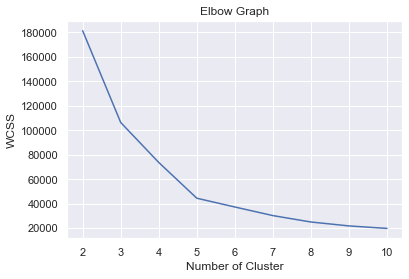

In [105]:
# plotting an elbow graph

sns.set()
plt.plot(range(2,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters wil be --> 5

In [112]:
#training the clustering model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2)

# return a laberl for each data point  on their cluster
y = kmeans.fit_predict(X)

print(y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


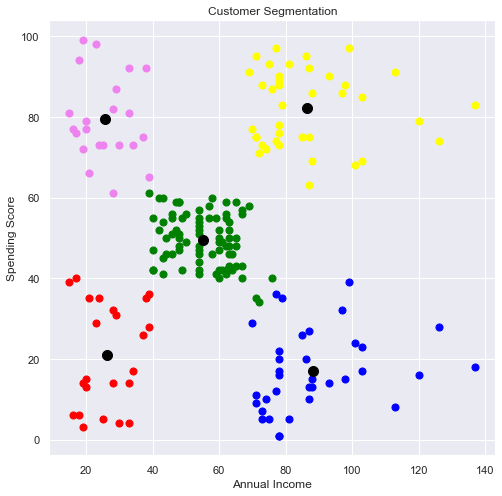

In [120]:
# visualizing all clusters

plt.figure(figsize = (8,8))
plt.scatter(X[y == 0,0], X[y == 0,1], s= 50, c= 'green', label = 'Cluster 1')
plt.scatter(X[y == 1,0], X[y == 1,1], s= 50, c= 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2,0], X[y == 2,1], s= 50, c= 'red', label = 'Cluster 3')
plt.scatter(X[y == 3,0], X[y == 3,1], s= 50, c= 'yellow', label = 'Cluster 4')
plt.scatter(X[y == 4,0], X[y == 4,1], s= 50, c= 'violet', label = 'Cluster 5')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c = 'black', label = 'centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()